In [ ]:
"""Aveek Bandyopadhyay
    240957118
    PG 51"""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Hypermart.csv",encoding='latin1')
print(df)


      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

# Initial data exploration

In [ ]:
#Initial data exploration
print("Information\n",df.info())
print()
print("Number of rowrs and columns",df.shape)
print()
print("Summary statistics\n",df.describe())
print()
print("Missing values: ",df.isnull().sum())
# Since there are no null values in the dataset, missing values must be in another format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Q1. Are there any duplicate or unnecessary attributes in the dataset? If so, identify and remove them to optimize data analysis.

In [ ]:

duplicates=df.duplicated().sum()
print(duplicates)
# There are no duplicated rows
# The column row ID is redundant as pandas uses its own in-built indexing. Hence, we may drop it.
df=df.drop(columns=["Row ID"])
#To check for unique entries in each column
print(df.nunique())


0
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64


In [ ]:
#Since countries column has only 1 unique value, it is unecessary
df=df.drop(columns=["Country"])
#We can convert the rest of the repetitive columns to categorical data for optimization
cat_cols = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']
df[cat_cols] = df[cat_cols].astype('category')
print(df.head())

         Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment             City       State  Postal Code  \
0      Claire Gute   Consumer        Henderson    Kentucky        42420   
1      Claire Gute   Consumer        Henderson    Kentucky        42420   
2  Darrin Van Huff  Corporate      Los Angeles  California        90036   
3   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311   
4   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311   

  Region       Product ID         Category Sub-Category  \
0  South  FUR-BO-10001798        Furniture    Bookc

# Q2. Identify if the dataset contains any missing data, inconsistencies in the values for a given attribute.

In [ ]:
missing_data = df.isnull().sum()

# Check for inconsistent values in key columns
unique_ship_modes = df['Ship Mode'].unique()
unique_segments = df['Segment'].unique()
unique_regions = df['Region'].unique()
print(unique_ship_modes)
print(unique_segments)
print(unique_regions) #We see that all key columns have strings properly capitalised and are consistent in format
print(missing_data) #Data had no missing values

['Second Class', 'Standard Class', 'First Class', 'Same Day']
Categories (4, object): ['First Class', 'Same Day', 'Second Class', 'Standard Class']
['Consumer', 'Corporate', 'Home Office']
Categories (3, object): ['Consumer', 'Corporate', 'Home Office']
['South', 'West', 'Central', 'East']
Categories (4, object): ['Central', 'East', 'South', 'West']
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


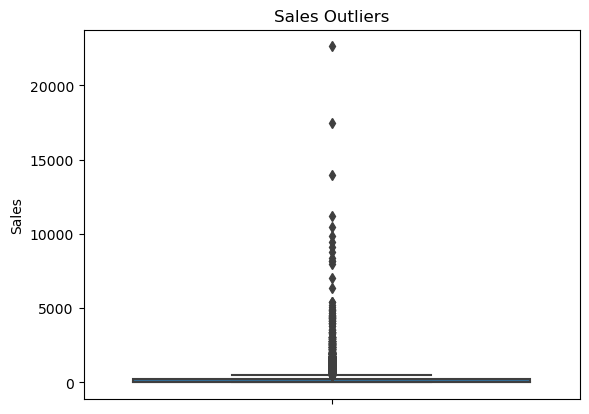

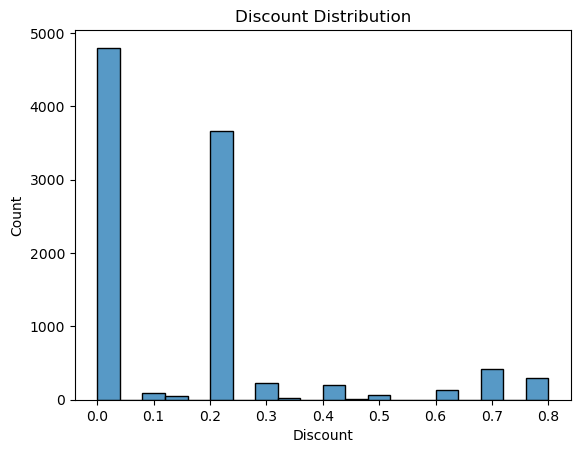

In [ ]:
# For numerical inconsistencies, we can catch outliers using a box plot and a histplot
sns.boxplot(y=df['Sales'])  # For detecting outliers
plt.title("Sales Outliers")
plt.show()
#According to the boxplot, sales column has many outliers, which could be bulk orders. it represents that some orders were very cheap while others were very expensive.
sns.histplot(df['Discount'], bins=20)
plt.title("Discount Distribution")
plt.show()
#

In [ ]:
#We inspect the sales attribute
df[df['Sales'] > 10000]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2623,CA-2017-127180,10/22/2017,10/24/2017,First Class,TA-21385,Tom Ashbrook,Home Office,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
2697,CA-2014-145317,3/18/2014,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,Jacksonville,Florida,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
4190,CA-2017-166709,11/17/2017,11/22/2017,Standard Class,HL-15040,Hunter Lopez,Consumer,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
6826,CA-2016-118689,10/2/2016,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,CA-2017-140151,3/23/2017,3/25/2017,First Class,RB-19360,Raymond Buch,Consumer,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808


# Q3. Perform exploratory data analysis using numpy, Pandas, Matplotlib and Seaborn to address the following

# a. Data distribution and Trends 

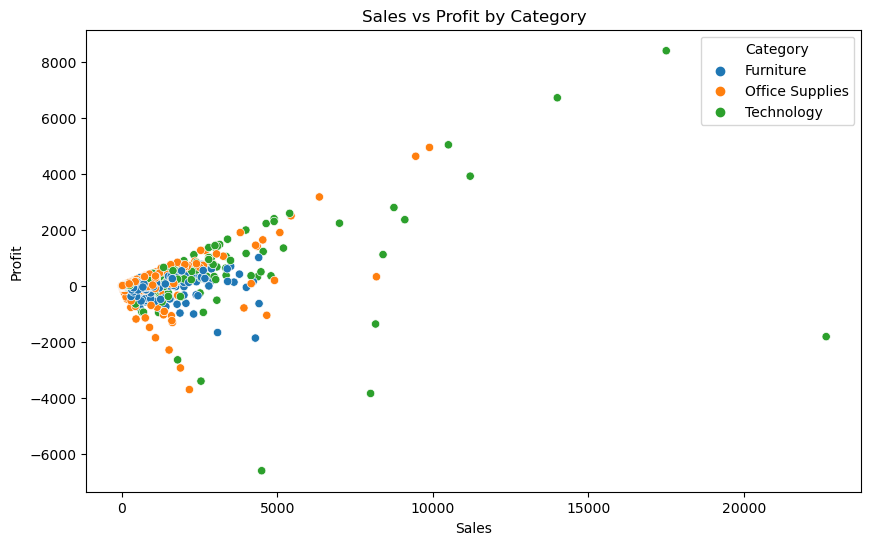

In [ ]:
#To visualise products with low profit margins and high sales, we use a scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title('Sales vs Profit by Category')
plt.show() 
# Inference is that most office supplies and some technology items are bought at low or negative profits. the issue could be a high discount.


In [ ]:
# We find the records which are present here.
high_sales_low_profit = df[(df['Sales'] > 1000) & (df['Profit'] < 0)]
print(high_sales_low_profit)
print("______________________")
#Display highest losses
print(df[df['Profit'] < 0].sort_values(by='Sales', ascending=False).head(10))

            Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
27    US-2015-150630   9/17/2015   9/21/2015  Standard Class    TB-21520   
165   CA-2014-139892    9/8/2014   9/12/2014  Standard Class    BM-11140   
167   CA-2014-139892    9/8/2014   9/12/2014  Standard Class    BM-11140   
215   CA-2015-146262    1/2/2015    1/9/2015  Standard Class    VW-21775   
262   US-2014-106992   9/19/2014   9/21/2014    Second Class    SB-20290   
...              ...         ...         ...             ...         ...   
9639  CA-2015-116638   1/28/2015   1/31/2015    Second Class    JH-15985   
9673  CA-2016-114867  12/23/2016  12/28/2016  Standard Class    FM-14290   
9712  CA-2014-114251   11/5/2014  11/10/2014  Standard Class    MD-17350   
9774  CA-2014-169019   7/26/2014   7/30/2014  Standard Class    LF-17185   
9787  CA-2017-144491   3/27/2017    4/1/2017  Standard Class    CJ-12010   

        Customer Name      Segment          City           State  Postal Code  \
27    

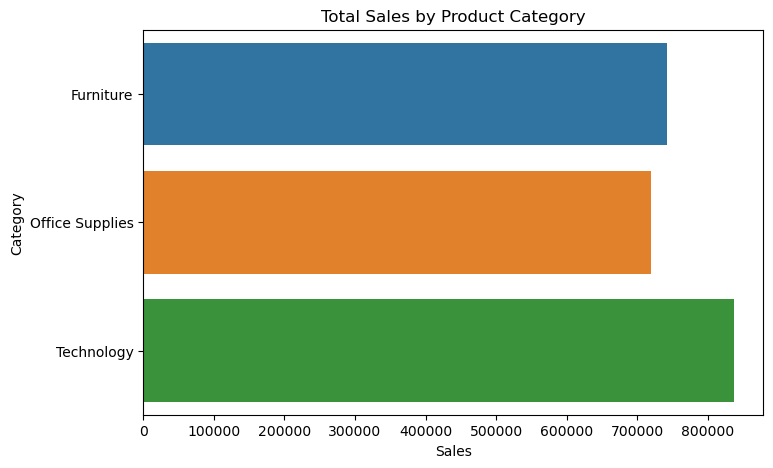

Category
Office Supplies    22906
Furniture           8028
Technology          6939
Name: Quantity, dtype: int64

In [ ]:
#Shows us which category sold the most
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title("Total Sales by Product Category")
plt.xlabel("Sales")
plt.ylabel("Category")
plt.show()
#Shows us quantity sold per category
df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

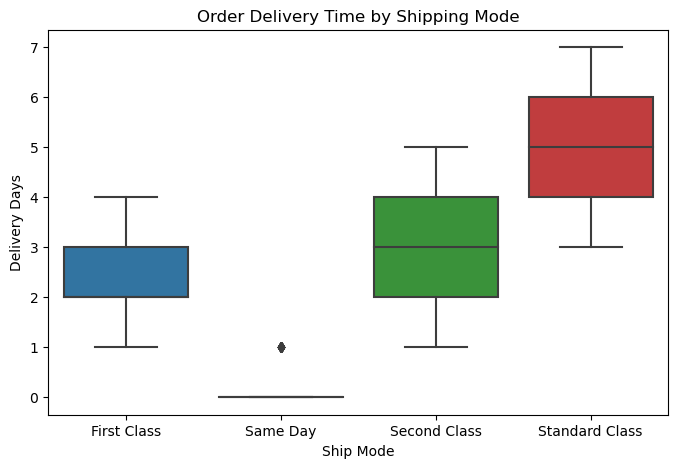

In [ ]:
# To check for time, we have to convert it to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Delivery_Days'] = (df['Ship Date'] - df['Order Date']).dt.days
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Ship Mode', y='Delivery_Days')
plt.title("Order Delivery Time by Shipping Mode")
plt.ylabel("Delivery Days")
plt.show()
#Plot shows us that shipping mode is clearly impacted by time, with shipping on same day having a median of 0-1.
# first class takes 2-3 days, second class takes 2-4 days, standard class takes 4-6 days in general.


# b. Customer Segmentation Insights

In [ ]:
# we analyze sales and profit by customer segment, repeat purchase behavior, and discount response.
segment_sales_profit = df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
# We group by segment ad then sum sales and profit. then we sort them in descending order.
segment_sales_profit["Profit ratio"]=segment_sales_profit['Profit']/segment_sales_profit["Sales"]
print(segment_sales_profit)


                    Sales       Profit  Profit ratio
Segment                                             
Consumer     1.161401e+06  134119.2092      0.115481
Corporate    7.061464e+05   91979.1340      0.130255
Home Office  4.296531e+05   60298.6785      0.140343


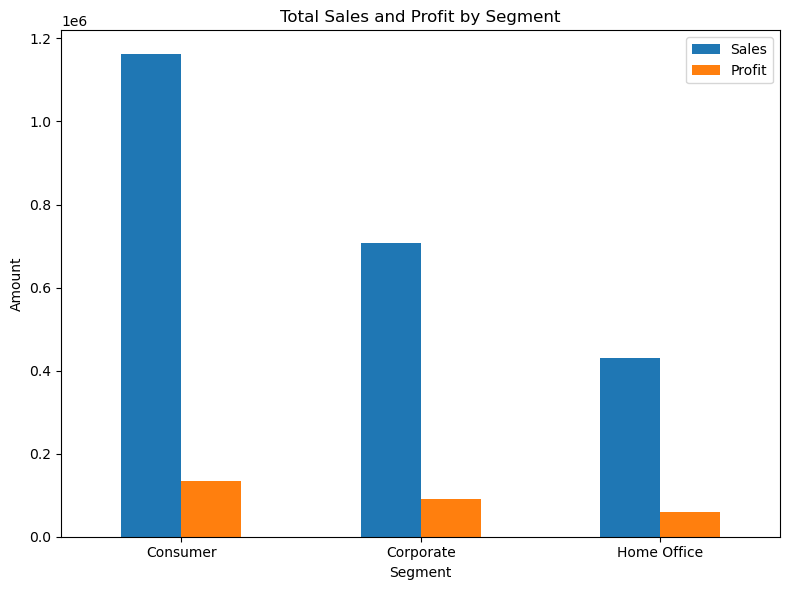

In [ ]:
segment_sales_profit.plot(kind='bar', title='Total Sales and Profit by Segment', figsize=(8, 6))
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# Plot shows us that consumer category has highest sales and highest profit. But the ratio of sales to profit is highest for home office.

In [ ]:
# Count of unique orders per customer by segment
customer_orders = df.groupby(['Customer ID', 'Segment'])['Order ID'].nunique().reset_index()
print(customer_orders)


     Customer ID      Segment  Order ID
0       AA-10315     Consumer         5
1       AA-10315    Corporate         0
2       AA-10315  Home Office         0
3       AA-10375     Consumer         9
4       AA-10375    Corporate         0
...          ...          ...       ...
2374    ZC-21910    Corporate         0
2375    ZC-21910  Home Office         0
2376    ZD-21925     Consumer         5
2377    ZD-21925    Corporate         0
2378    ZD-21925  Home Office         0

[2379 rows x 3 columns]


In [ ]:
# We find the average repeat orders by customers made in different categories
repeat_behavior = customer_orders.groupby('Segment')['Order ID'].mean().rename('Avg Orders per Customer')
print(repeat_behavior)

Segment
Consumer       3.261034
Corporate      1.909206
Home Office    1.146280
Name: Avg Orders per Customer, dtype: float64


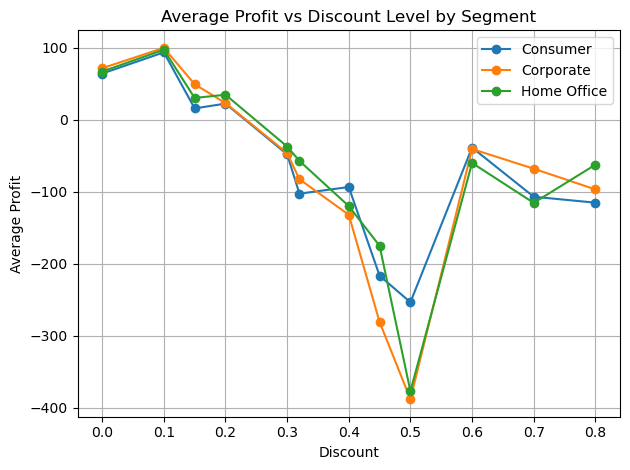

In [ ]:
# Average profit at different discount levels by segment
discount_response = df.groupby(['Segment', 'Discount'])['Profit'].mean().reset_index()

# Plot
for segment in df['Segment'].unique():
    segment_data = discount_response[discount_response['Segment'] == segment]
    plt.plot(segment_data['Discount'], segment_data['Profit'], marker='o', label=segment)

plt.title('Average Profit vs Discount Level by Segment')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# The plot shows us that corporate and home office segments have the highest losses, especially the records where discount is 0.5 
# Consumer segment hence responds better to discounts

# C. Regional & Growth Opportunities




               Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
Central  501239.8908   39706.3625
South    391721.9050   46749.4303


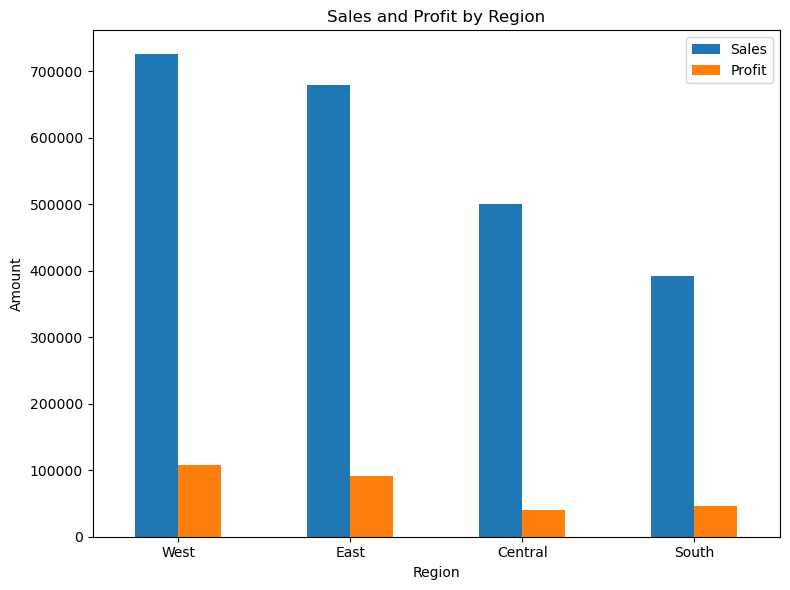

In [ ]:
# We evaluate regional performance to identify areas for potential business expansion and strategy optimization.
# Total Sales and Profit by Region
region_performance = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print(region_performance)

# Plot
region_performance.plot(kind='bar', title='Sales and Profit by Region', figsize=(8, 6))
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# We see that profit and sales in the central and south region are less

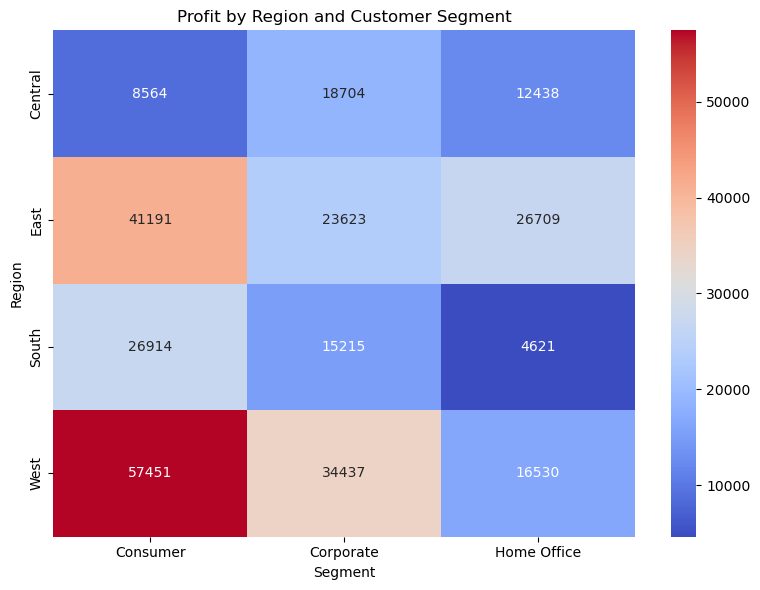

In [ ]:
# Pivot table for heatmap
pivot = df.pivot_table(values='Profit', index='Region', columns='Segment', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Profit by Region and Customer Segment")
plt.tight_layout()
plt.show()
# From the heatmap we see West has the highest overall profit in all three customer segments
# East is the second most profitable region